# **Project Analisis Data: Bike Sharing Dataset**

- Nama : Bagas Aulia Alfasyam
- Email : bagasaulia7@gmail.com
- ID Dicoding : bagason

## **Pendahuluan** 
Dalam era transportasi modern, sistem bike-sharing menjadi solusi inovatif dalam mobilitas perkotaan yang lebih ramah lingkungan dan efisien. Sistem ini memungkinkan pengguna untuk menyewa sepeda dari satu lokasi dan mengembalikannya di lokasi lain dengan mudah, sehingga memberikan alternatif transportasi yang fleksibel dan berkontribusi terhadap pengurangan kemacetan, polusi udara, serta peningkatan kesehatan masyarakat.

Proyek ini berfokus pada analisis data dari sistem Capital Bikeshare, yang beroperasi di Washington, D.C., dengan data historis selama dua tahun (2011-2012). Dataset yang digunakan mencakup berbagai faktor lingkungan dan musiman yang mempengaruhi jumlah penyewaan sepeda, seperti kondisi cuaca, hari libur, dan waktu dalam sehari. Dengan memanfaatkan dataset ini, kami dapat mengeksplorasi tren penggunaan sepeda, membangun model prediktif untuk estimasi jumlah penyewaan, serta mengidentifikasi pola anomali yang mungkin berkaitan dengan peristiwa khusus di kota.

### Pertanyaan Bisnis

Dalam proyek ini, kita akan menjawab beberapa pertanyaan bisnis berikut :
1. Bagaimana pola penggunaan sepeda bervariasi berdasarkan musim dan kondisi cuaca?
2. Apa perbedaan perilaku antara pengguna kasual dan terdaftar dalam penggunaan layanan _Bike Sharing_
3. Kapan waktu puncak penggunaan sepeda dan bagaimana pengaruh hari kerja terhadap jumlah sewa?
4. Dapatkah kita mengidentifikasi faktor-faktor utama yang mempengaruhi jumlah penyewaan sepeda?

In [97]:
## Import Semua Packages/Library yang Digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## **Data Wrangling**

### **Gathering Data**

Memuat data dan menampilkan 5 pertama dari tiap dataset yang di inisialisasi

In [3]:
hour_data = pd.read_csv('./Dataset/hour.csv')
day_data = pd.read_csv('./Dataset/day.csv')

### **Penjelasan Tiap Variabel dalam Dataset Bike Sharing**  

Dataset ini terdiri dari beberapa variabel yang mencerminkan informasi waktu, kondisi cuaca, dan jumlah penyewaan sepeda. Berikut adalah deskripsi masing-masing variabel:  


### **1. Variabel Identitas dan Waktu**  
| **Variabel** | **Tipe Data** | **Keterangan** |
|-------------|-------------|---------------|
| `instant`   | Integer     | Indeks unik untuk setiap entri data. |
| `dteday`    | Date        | Tanggal pencatatan data (format YYYY-MM-DD). |
| `yr`        | Integer     | Tahun (0: 2011, 1: 2012). |
| `mnth`      | Integer     | Bulan dalam setahun (1: Januari, ..., 12: Desember). |
| `hr`        | Integer     | Jam dalam sehari (0–23) – hanya ada di `hour.csv`. |
| `weekday`   | Integer     | Hari dalam seminggu (0: Minggu, ..., 6: Sabtu). |


### **2. Variabel Musiman dan Kalender**  
| **Variabel**   | **Tipe Data** | **Keterangan** |
|---------------|-------------|---------------|
| `season`      | Integer     | Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin). |
| `holiday`     | Integer     | Apakah hari tersebut adalah hari libur? (0: Bukan libur, 1: Libur). |
| `workingday`  | Integer     | Apakah hari tersebut hari kerja (bukan akhir pekan atau libur)? (0: Bukan, 1: Ya). |


### **3. Variabel Cuaca dan Lingkungan**  
| **Variabel**  | **Tipe Data** | **Keterangan** |
|--------------|-------------|---------------|
| `weathersit` | Integer     | Kondisi cuaca (1: Cerah, 2: Berkabut, 3: Hujan ringan/salju, 4: Hujan lebat/salju). |
| `temp`       | Float       | Suhu aktual (nilai dinormalisasi, max = 41°C). |
| `atemp`      | Float       | Suhu yang terasa (nilai dinormalisasi, max = 50°C). |
| `hum`        | Float       | Kelembapan udara (nilai dinormalisasi, max = 100%). |
| `windspeed`  | Float       | Kecepatan angin (nilai dinormalisasi, max = 67). |


### **4. Variabel Target (Jumlah Penyewaan Sepeda)**  
| **Variabel**   | **Tipe Data** | **Keterangan** |
|---------------|-------------|---------------|
| `casual`      | Integer     | Jumlah pengguna tidak terdaftar (casual users). |
| `registered`  | Integer     | Jumlah pengguna terdaftar (registered users). |
| `cnt`         | Integer     | Total jumlah penyewa sepeda (casual + registered). |


In [4]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **Assessing Data**

Melihat informasi awal tentang dataset, termasuk jumlah baris dan kolom, dan tipe data masing-masing kolom.

In [6]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa data yang hiland dan Menampilkan statistik deskriptif dari tiap data

In [8]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Memeriksa nilai unik pada kolom kategori

In [10]:
for column in ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']:
    if column in hour_data.columns:
        print(f"Nilai unik dalam kolom {column}: {hour_data[column].unique()}")

Nilai unik dalam kolom season: [1 2 3 4]
Nilai unik dalam kolom yr: [0 1]
Nilai unik dalam kolom mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Nilai unik dalam kolom hr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Nilai unik dalam kolom holiday: [0 1]
Nilai unik dalam kolom weekday: [6 0 1 2 3 4 5]
Nilai unik dalam kolom workingday: [0 1]
Nilai unik dalam kolom weathersit: [1 2 3 4]


### Cleaning Data

Konversi kolom yang relavan untuk di konversi serta menambahkan kolom untuk mempermudah analisis

In [11]:
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

Menambahkan kolom baru untuk mempermudah analisis

In [12]:
hour_data['year'] = hour_data['dteday'].dt.year
hour_data['month'] = hour_data['dteday'].dt.month
hour_data['day'] = hour_data['dteday'].dt.day
hour_data['day_of_week'] = hour_data['dteday'].dt.day_name()

day_data['year'] = day_data['dteday'].dt.year
day_data['month'] = day_data['dteday'].dt.month
day_data['day'] = day_data['dteday'].dt.day
day_data['day_of_week'] = day_data['dteday'].dt.day_name()

Mapping nilai numerik ke label yang lebih deskriptif

In [14]:

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

Menerapkan Mapping

In [15]:
hour_data['season_label'] = hour_data['season'].map(season_mapping)
hour_data['month_label'] = hour_data['mnth'].map(month_mapping)
hour_data['weather_label'] = hour_data['weathersit'].map(weather_mapping)
hour_data['weekday_label'] = hour_data['weekday'].map(weekday_mapping)

day_data['season_label'] = day_data['season'].map(season_mapping)
day_data['month_label'] = day_data['mnth'].map(month_mapping)
day_data['weather_label'] = day_data['weathersit'].map(weather_mapping)
day_data['weekday_label'] = day_data['weekday'].map(weekday_mapping)

Menghitung persentase pengguna kasual dan terdaftar

In [16]:
hour_data['casual_percent'] = hour_data['casual'] / hour_data['cnt'] * 100
hour_data['registered_percent'] = hour_data['registered'] / hour_data['cnt'] * 100

day_data['casual_percent'] = day_data['casual'] / day_data['cnt'] * 100
day_data['registered_percent'] = day_data['registered'] / day_data['cnt'] * 100

Mengembalikan suhu, suhu terasa, kelembaban, dan kecepatan angin ke nilai asli

In [17]:
hour_data['temp_actual'] = hour_data['temp'] * 41  # dalam Celsius
hour_data['atemp_actual'] = hour_data['atemp'] * 50  # dalam Celsius
hour_data['hum_actual'] = hour_data['hum'] * 100  # dalam persentase
hour_data['windspeed_actual'] = hour_data['windspeed'] * 67  # dalam km/h

day_data['temp_actual'] = day_data['temp'] * 41  # dalam Celsius
day_data['atemp_actual'] = day_data['atemp'] * 50  # dalam Celsius
day_data['hum_actual'] = day_data['hum'] * 100  # dalam persentase
day_data['windspeed_actual'] = day_data['windspeed'] * 67  # dalam km/h

In [18]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,season_label,month_label,weather_label,weekday_label,casual_percent,registered_percent,temp_actual,atemp_actual,hum_actual,windspeed_actual
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,Spring,Jan,Clear,Saturday,18.750000,81.250000,9.84,14.395,81.0,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,Spring,Jan,Clear,Saturday,20.000000,80.000000,9.02,13.635,80.0,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,Spring,Jan,Clear,Saturday,15.625000,84.375000,9.02,13.635,80.0,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,Spring,Jan,Clear,Saturday,23.076923,76.923077,9.84,14.395,75.0,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,Spring,Jan,Clear,Saturday,0.000000,100.000000,9.84,14.395,75.0,0.0


## _**Explanatory Data Analysis**_ **(EDA)**

### **Bagaimana pola penggunaan sepeda bervariasi berdasarkan musim dan kondisi cuaca?**

#### **Analisis Berdasarkan musim**

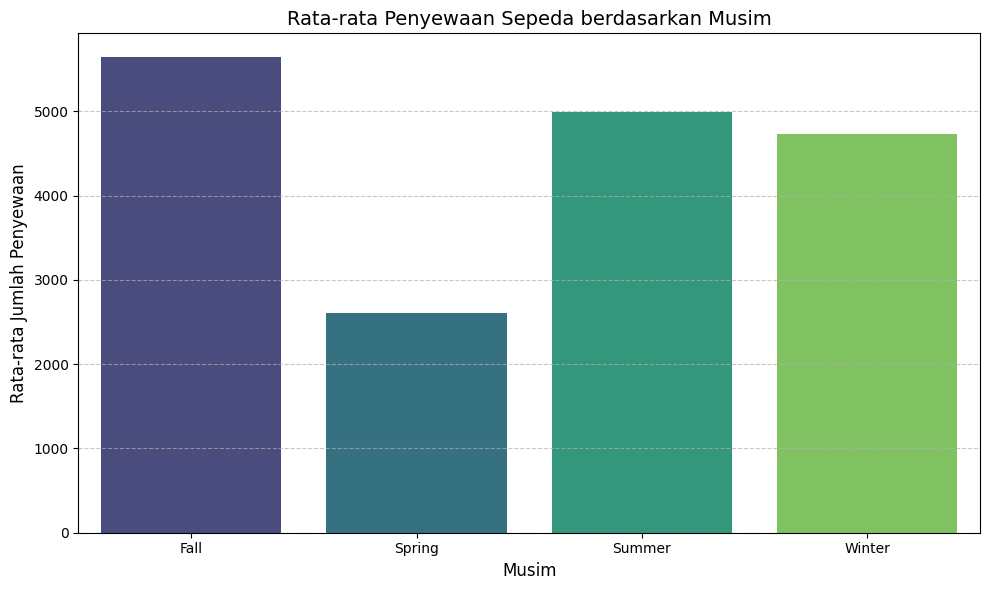

In [23]:
seasonal_usage = day_data.groupby('season_label')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season_label', y='cnt', hue='season_label', data=seasonal_usage, palette='viridis', legend=False)
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


#### **Analisis berdasarkan kondisi cuaca**

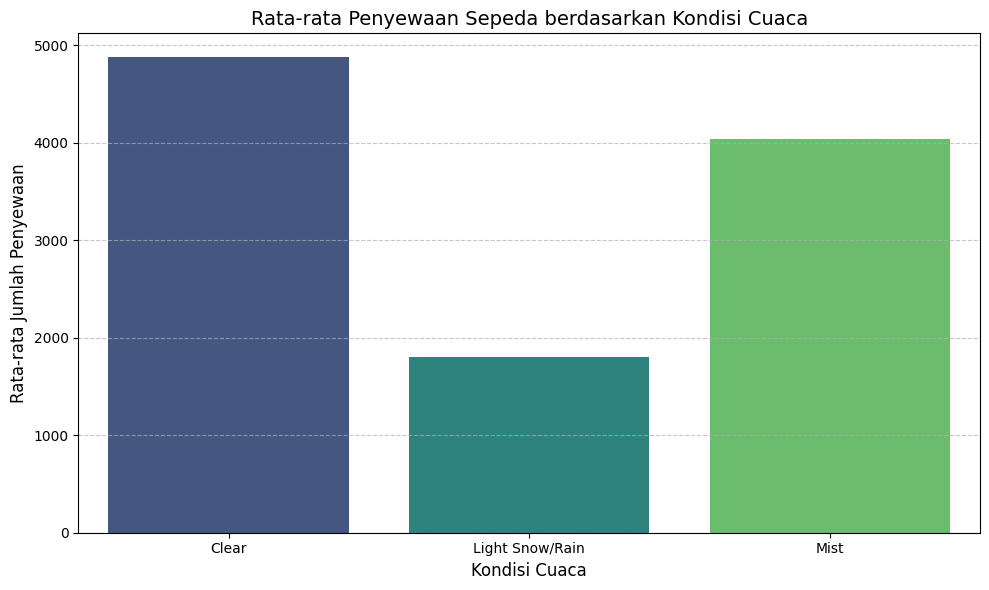

In [25]:
weather_usage = day_data.groupby('weather_label')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='weather_label', y='cnt', hue='weather_label', data=weather_usage, palette='viridis', legend=False)
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#### **Analisis berdasarkan musim dan kondisi cuaca**

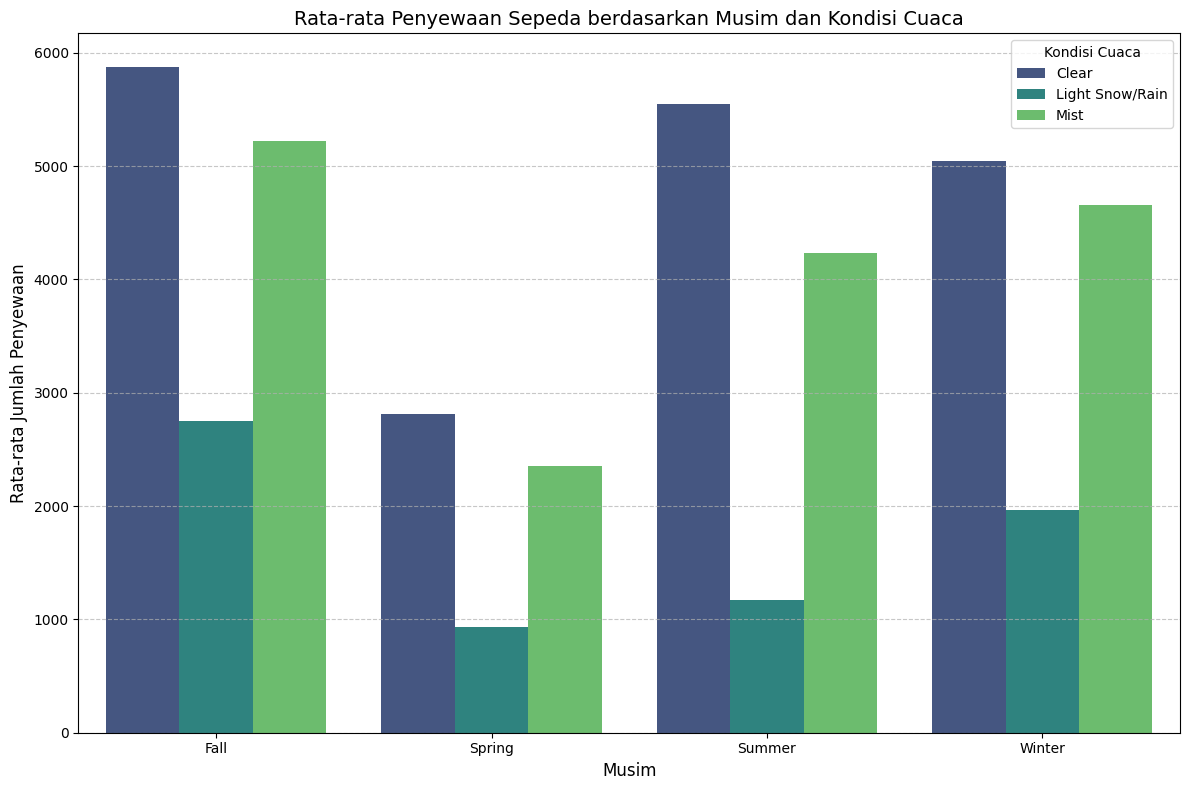

In [27]:
season_weather_usage = day_data.groupby(['season_label', 'weather_label'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='season_label', y='cnt', hue='weather_label', data=season_weather_usage, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Musim dan Kondisi Cuaca', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.legend(title='Kondisi Cuaca', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#### **Analisis berdasarkan suhu**

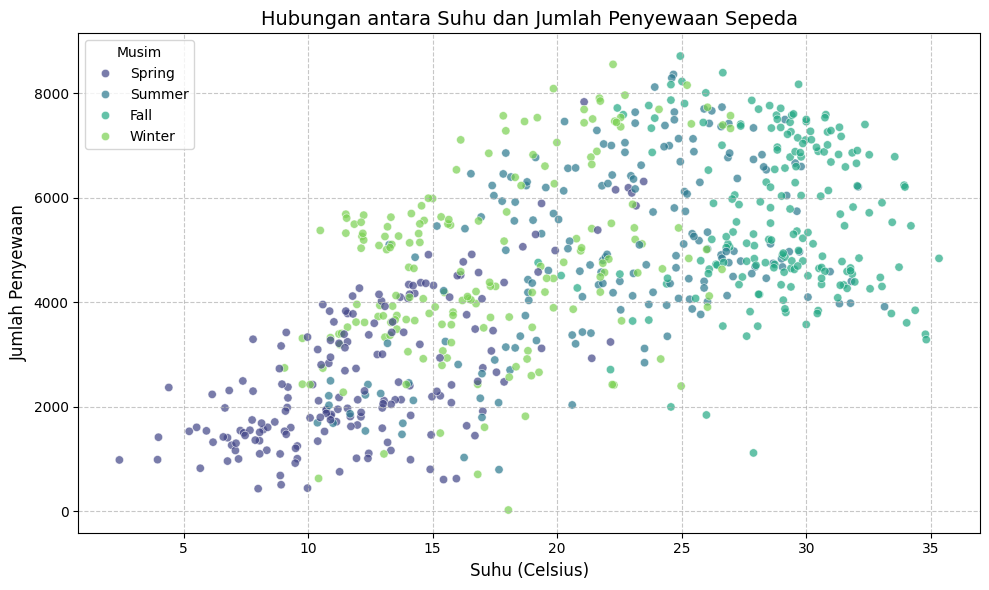

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_actual', y='cnt', data=day_data, hue='season_label', palette='viridis', alpha=0.7)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda', fontsize=14)
plt.xlabel('Suhu (Celsius)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Musim', fontsize=10)
plt.tight_layout()
plt.show()

### **Apa perbedaan perilaku antara pengguna kasual dan terdaftar dalam penggunaan layanan bike sharing?**

Perbandingan jumlah pengguna kasual dan terdaftar berdasarkan hari dalam seminggu

In [29]:
weekday_user_type = hour_data.groupby('weekday_label')[['casual', 'registered']].mean().reset_index()
weekday_user_type_melted = pd.melt(weekday_user_type, id_vars=['weekday_label'], 
                                   value_vars=['casual', 'registered'],
                                   var_name='user_type', value_name='count')

Mengurutkan hari sesuai urutan dalam seminggu

In [30]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_user_type_melted['weekday_label'] = pd.Categorical(weekday_user_type_melted['weekday_label'], 
                                                          categories=day_order, ordered=True)
weekday_user_type_melted = weekday_user_type_melted.sort_values('weekday_label')

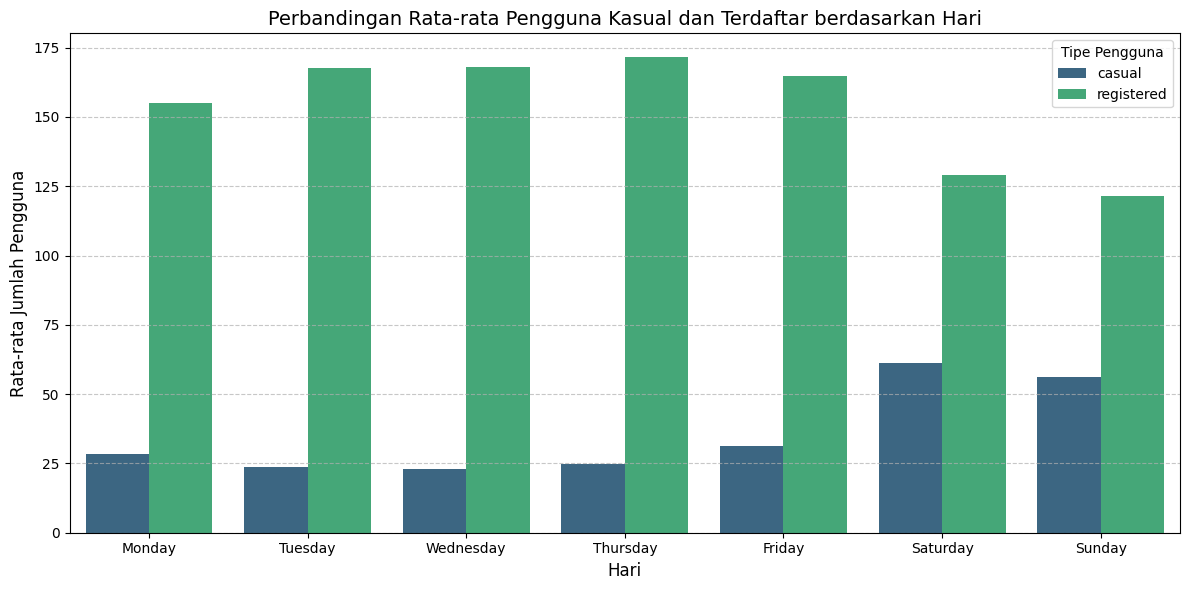

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday_label', y='count', hue='user_type', data=weekday_user_type_melted, palette='viridis')
plt.title('Perbandingan Rata-rata Pengguna Kasual dan Terdaftar berdasarkan Hari', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna', fontsize=12)
plt.legend(title='Tipe Pengguna', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Perbandingan jumlah pengguna kasual dan terdaftar berdasarkan jam

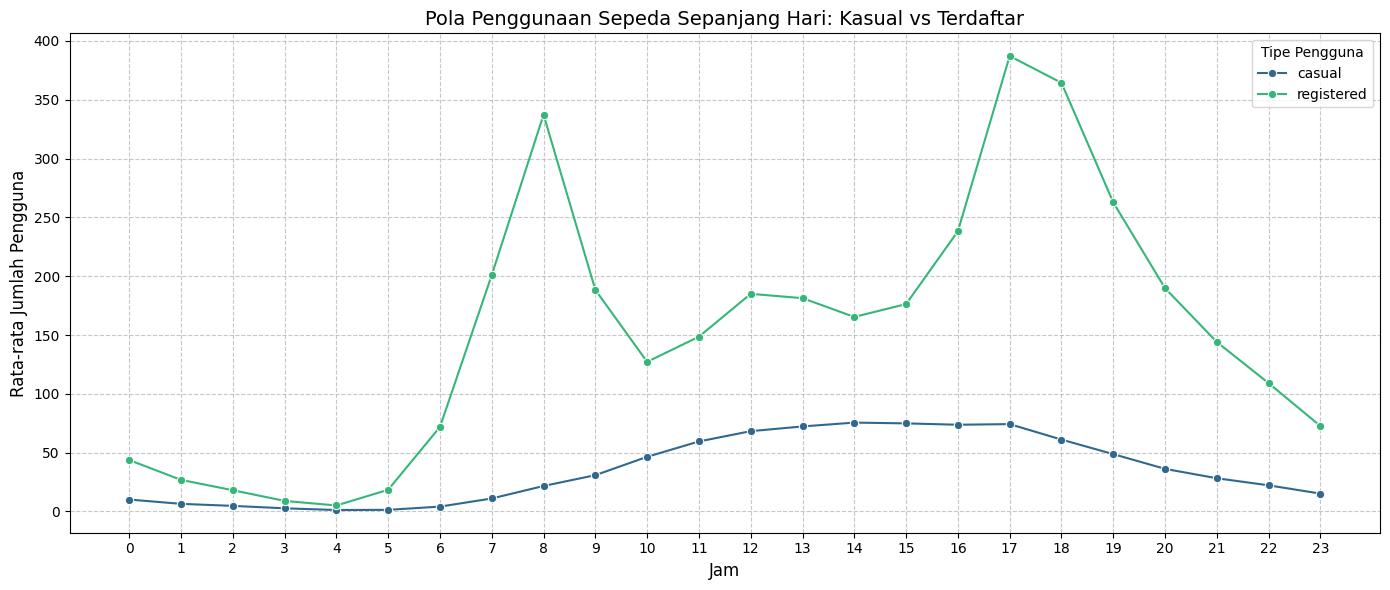

In [32]:
hourly_user_type = hour_data.groupby('hr')[['casual', 'registered']].mean().reset_index()
hourly_user_type_melted = pd.melt(hourly_user_type, id_vars=['hr'], 
                                 value_vars=['casual', 'registered'],
                                 var_name='user_type', value_name='count')

plt.figure(figsize=(14, 6))
sns.lineplot(x='hr', y='count', hue='user_type', data=hourly_user_type_melted, marker='o', palette='viridis')
plt.title('Pola Penggunaan Sepeda Sepanjang Hari: Kasual vs Terdaftar', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna', fontsize=12)
plt.legend(title='Tipe Pengguna', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Perbandingan jumlah pengguna kasual dan terdaftar berdasarkan musim

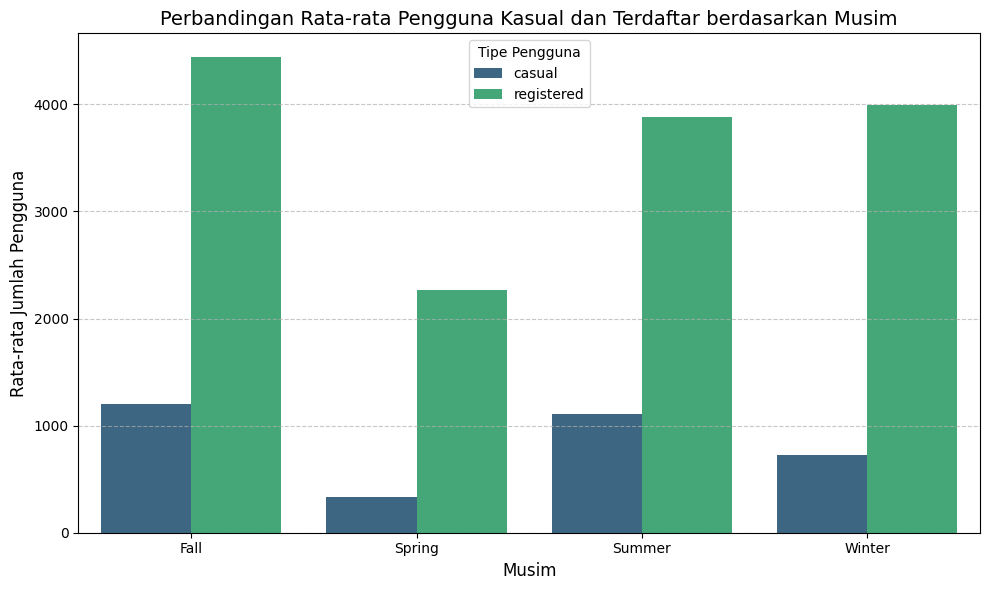

In [33]:
season_user_type = day_data.groupby('season_label')[['casual', 'registered']].mean().reset_index()
season_user_type_melted = pd.melt(season_user_type, id_vars=['season_label'], 
                                 value_vars=['casual', 'registered'],
                                 var_name='user_type', value_name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='season_label', y='count', hue='user_type', data=season_user_type_melted, palette='viridis')
plt.title('Perbandingan Rata-rata Pengguna Kasual dan Terdaftar berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna', fontsize=12)
plt.legend(title='Tipe Pengguna', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### **Apa perbedaan perilaku antara pengguna kasual dan terdaftar dalam penggunaan layanan bike sharing?**

Analisis waktu puncak berdasarkan jam

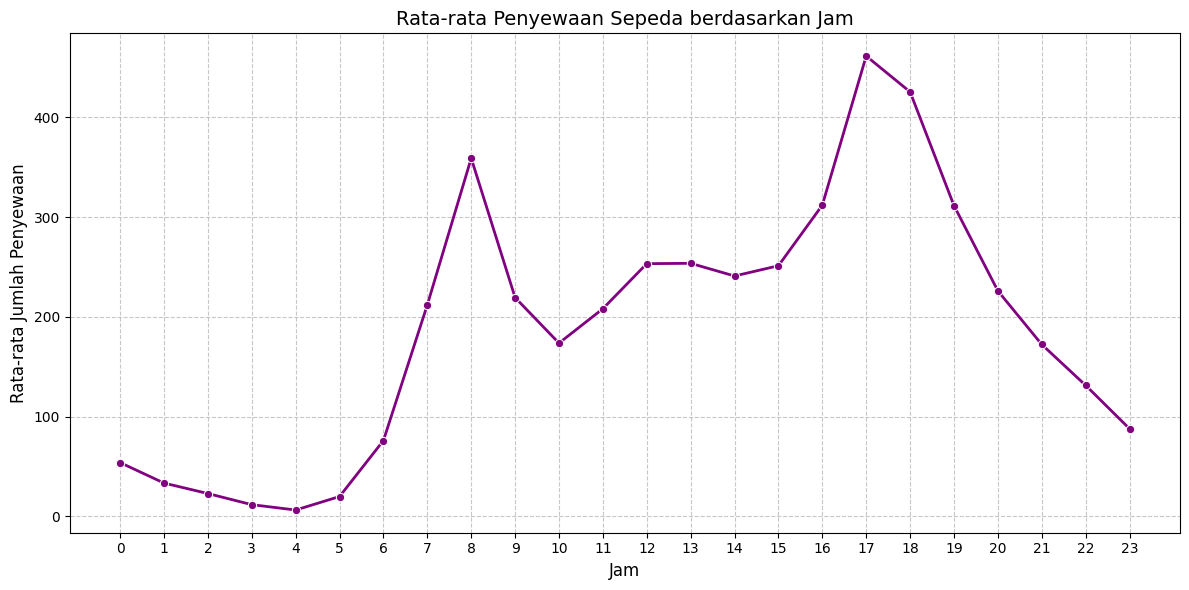

In [34]:
hourly_rentals = hour_data.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_rentals, marker='o', color='purple', linewidth=2)
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Analisis waktu puncak berdasarkan jam dan hari kerja

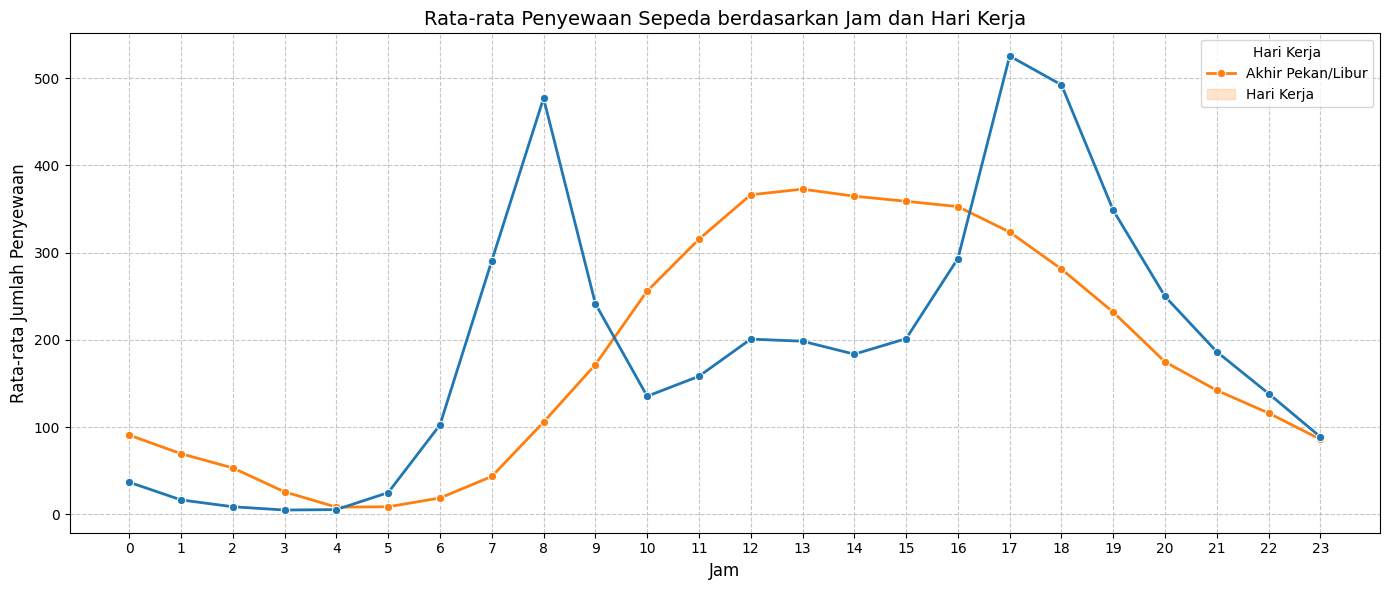

In [35]:
hourly_workingday = hour_data.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=hourly_workingday, 
             marker='o', palette=['#ff7f0e', '#1f77b4'], linewidth=2)
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Jam dan Hari Kerja', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.legend(title='Hari Kerja', labels=['Akhir Pekan/Libur', 'Hari Kerja'], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Analisis berdasarkan hari dalam seminggu

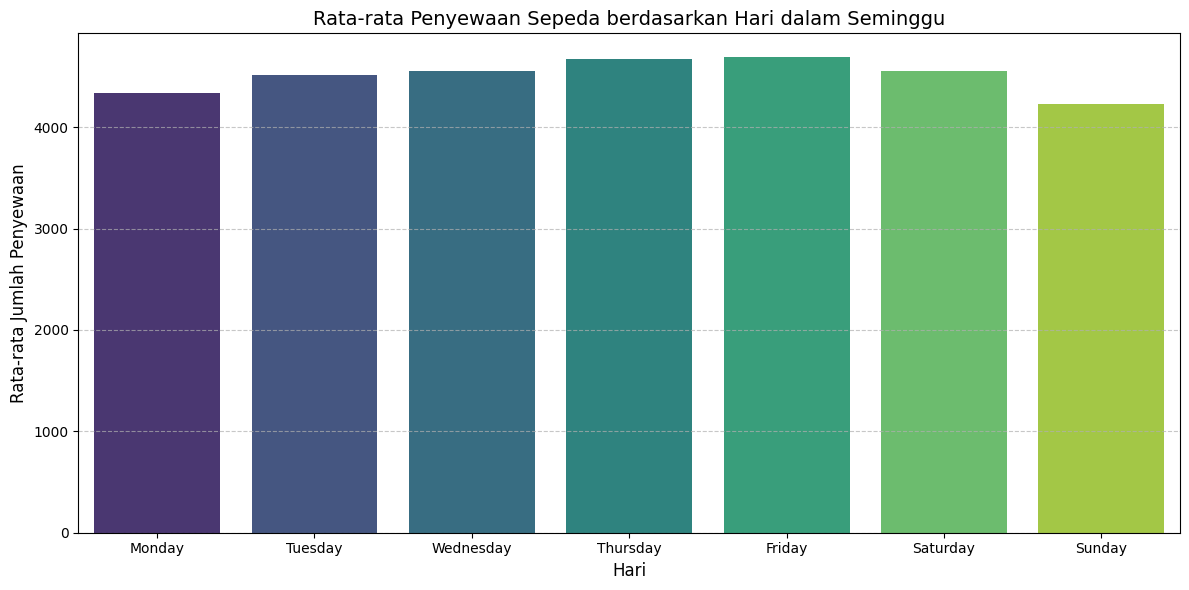

In [37]:
weekday_rentals = day_data.groupby('weekday_label')['cnt'].mean().reset_index()
weekday_rentals['weekday_label'] = pd.Categorical(weekday_rentals['weekday_label'], 
                                               categories=day_order, ordered=True)
weekday_rentals = weekday_rentals.sort_values('weekday_label')

plt.figure(figsize=(12, 6))
sns.barplot(x='weekday_label', y='cnt', hue='weekday_label', data=weekday_rentals, palette='viridis', legend=False)
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Hari dalam Seminggu', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### **Dapatkah kita mengidentifikasi faktor-faktor utama yang mempengaruhi jumlah penyewaan sepeda?**

Menganalisis korelasi antara variabel numerik dan jumlah penyewaan

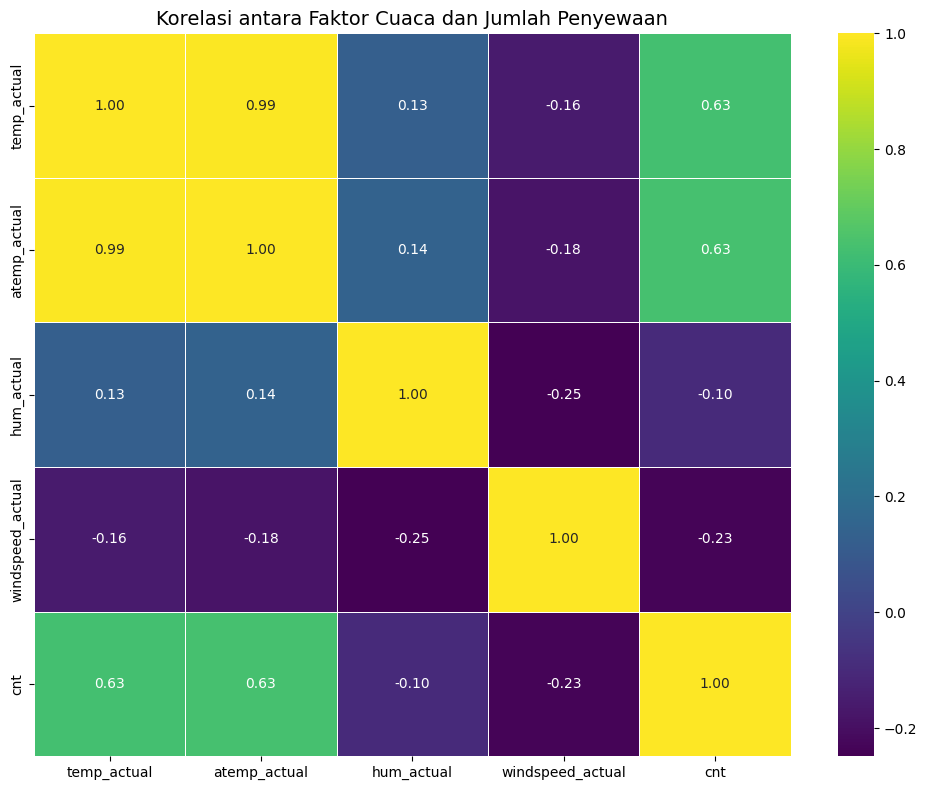

In [38]:
correlation_vars = ['temp_actual', 'atemp_actual', 'hum_actual', 'windspeed_actual', 'cnt']
correlation_matrix = day_data[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Korelasi antara Faktor Cuaca dan Jumlah Penyewaan', fontsize=14)
plt.tight_layout()
plt.show()

Visualisasi hubungan antara suhu dan jumlah penyewaan

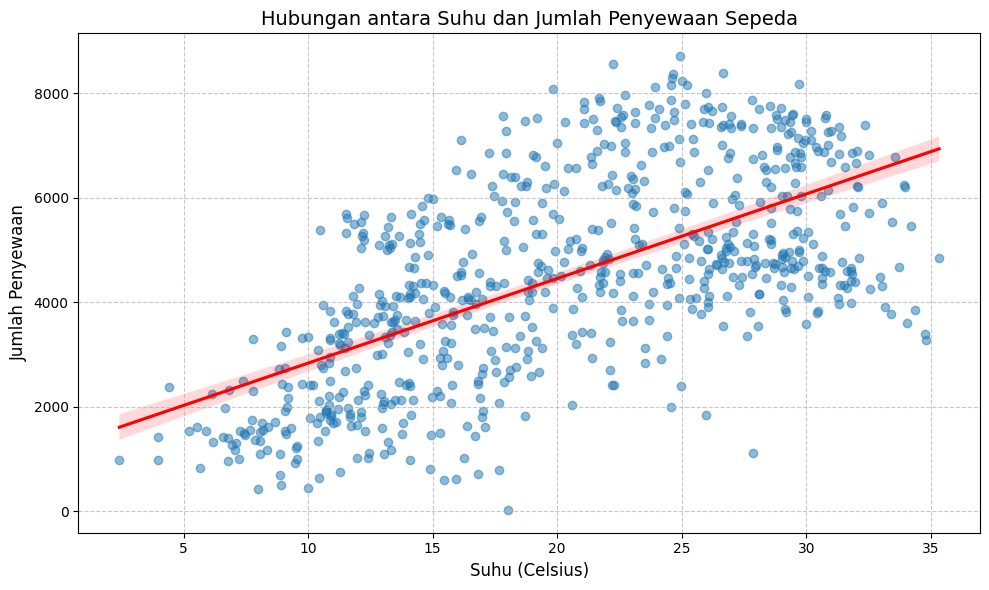

In [39]:
plt.figure(figsize=(10, 6))
sns.regplot(x='temp_actual', y='cnt', data=day_data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda', fontsize=14)
plt.xlabel('Suhu (Celsius)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Visualisasi hubungan antara kelembaban dan jumlah penyewaan

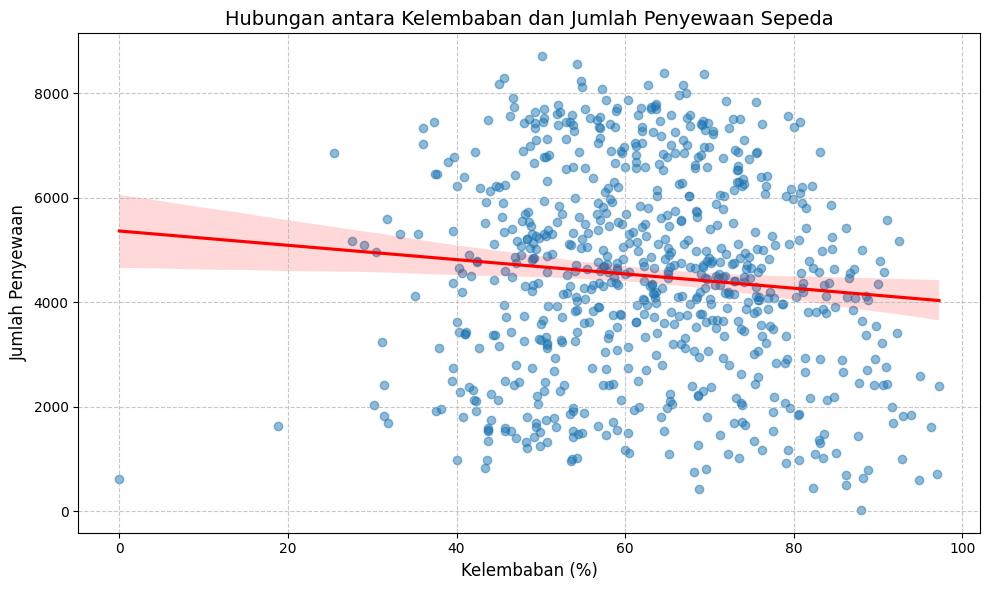

In [40]:
plt.figure(figsize=(10, 6))
sns.regplot(x='hum_actual', y='cnt', data=day_data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Hubungan antara Kelembaban dan Jumlah Penyewaan Sepeda', fontsize=14)
plt.xlabel('Kelembaban (%)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Analisis pola penyewaan sepeda bulanan selama 2 tahun

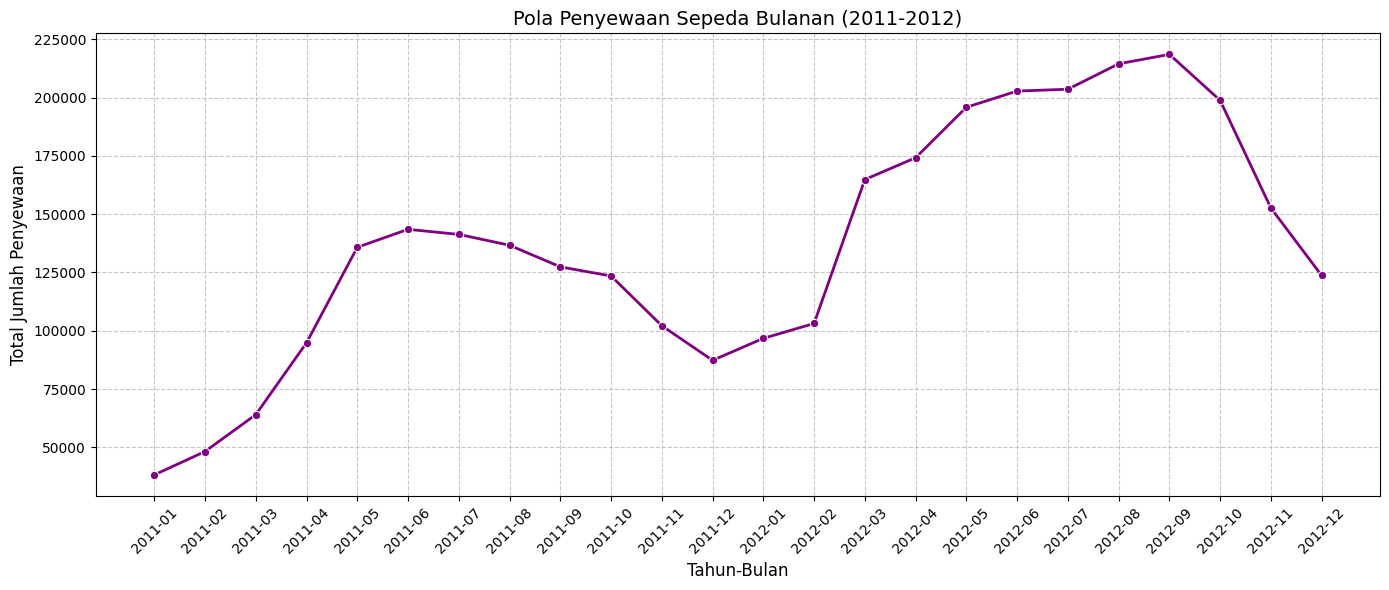

In [41]:
monthly_rentals = day_data.groupby(['year', 'month'])['cnt'].sum().reset_index()
monthly_rentals['year_month'] = monthly_rentals['year'].astype(str) + '-' + monthly_rentals['month'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))
sns.lineplot(x='year_month', y='cnt', data=monthly_rentals, marker='o', color='purple', linewidth=2)
plt.title('Pola Penyewaan Sepeda Bulanan (2011-2012)', fontsize=14)
plt.xlabel('Tahun-Bulan', fontsize=12)
plt.ylabel('Total Jumlah Penyewaan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [96]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant             731 non-null    int64         
 1   dteday              731 non-null    datetime64[ns]
 2   season              731 non-null    int64         
 3   yr                  731 non-null    int64         
 4   mnth                731 non-null    int64         
 5   holiday             731 non-null    int64         
 6   weekday             731 non-null    int64         
 7   workingday          731 non-null    int64         
 8   weathersit          731 non-null    int64         
 9   temp                731 non-null    float64       
 10  atemp               731 non-null    float64       
 11  hum                 731 non-null    float64       
 12  windspeed           731 non-null    float64       
 13  casual              731 non-null    int64         

## **Analisis Lanjutan: Segmentasi dengan _K-Means Clustering_**

**Import library untuk clustering**

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

**Memilih fitur untuk clustering**

In [79]:
features = ['temp_actual', 'hum_actual', 'windspeed_actual', 'casual', 'registered', 'cnt']
X = day_data[features].copy()

**Standarisasi data**

In [80]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

Menentukan jumlah cluster optimal dengan metode **Elbow**

In [81]:
inertia = []
silhouette_scores = []
k_range = range(2,11)

In [82]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x_scaled, kmeans.labels_))

**Plot Elbow Method**

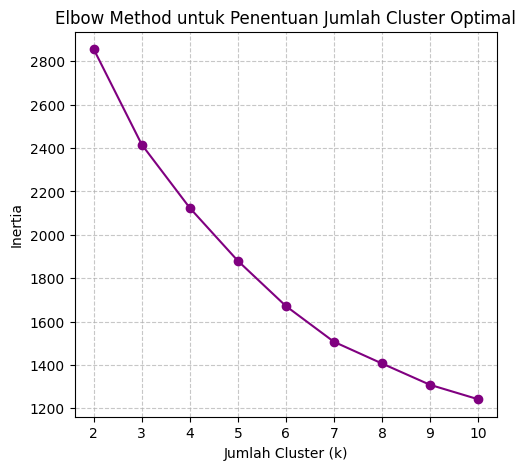

In [83]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', color='purple')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Penentuan Jumlah Cluster Optimal')
plt.grid(True, linestyle='--', alpha=0.7)

**Plot Silhouette Scores**

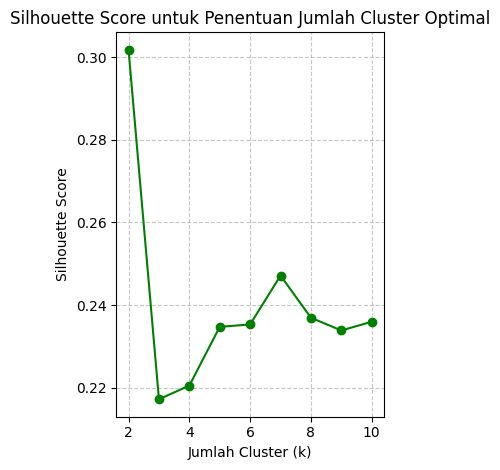

In [84]:
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', color='green')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Penentuan Jumlah Cluster Optimal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Berdasarkan analisis di atas, kita pilih jumlah cluster optimal**

In [85]:
optimal_k = 4 #berdasarkan hasil dari Elbow Method dan Silhouette Score

**Melakukan Clustering**

In [88]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
day_data['cluster'] = kmeans.fit_predict(x_scaled)

**Analisis karakteristik cluster**

In [89]:
cluster_summary = day_data.groupby('cluster')[features].mean().reset_index()
print("Karakteristik cluster summary :")
display(cluster_summary)

Karakteristik cluster summary :


,cluster,temp_actual,hum_actual,windspeed_actual,casual,registered,cnt
0,0,11.702150,62.922898,14.323116,251.661017,1734.355932,1986.016949
1,1,23.322830,72.630619,10.214019,768.772093,3588.958140,4357.730233
2,2,26.474747,60.449005,11.007926,1578.154229,5230.980100,6809.134328
3,3,17.681625,50.694710,17.287279,673.753623,3932.086957,4605.840580


**Visualisasi distribusi cluster**

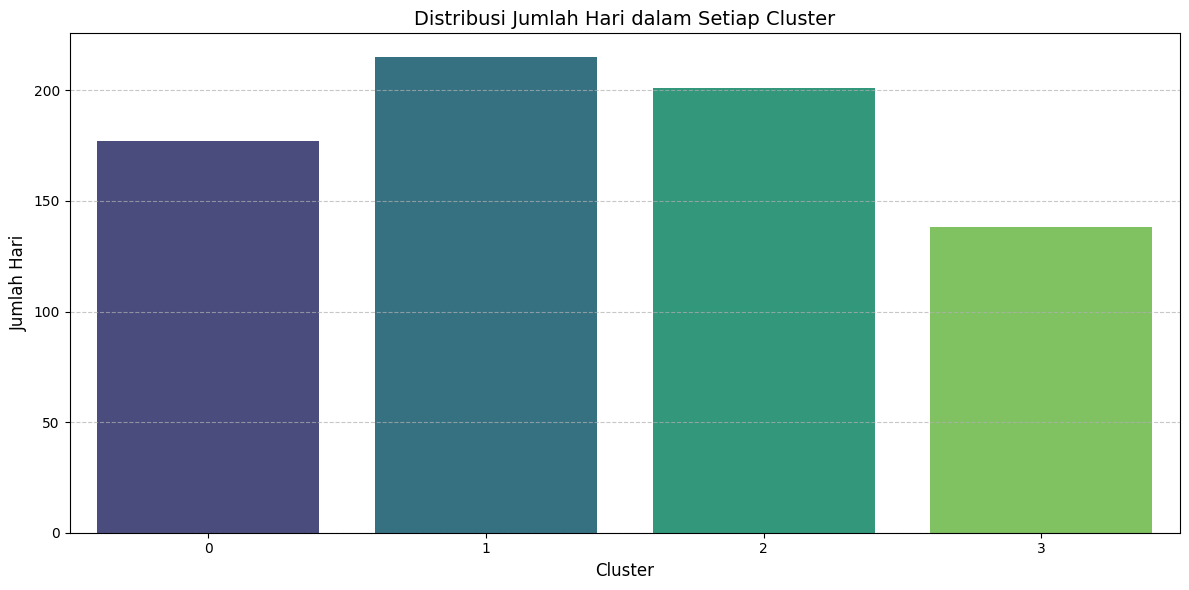

In [90]:
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster', data=day_data, palette='viridis')
plt.title('Distribusi Jumlah Hari dalam Setiap Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Jumlah Hari', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Visualisasi cluster berdasarkan suhu dan jumlah penyewaan**

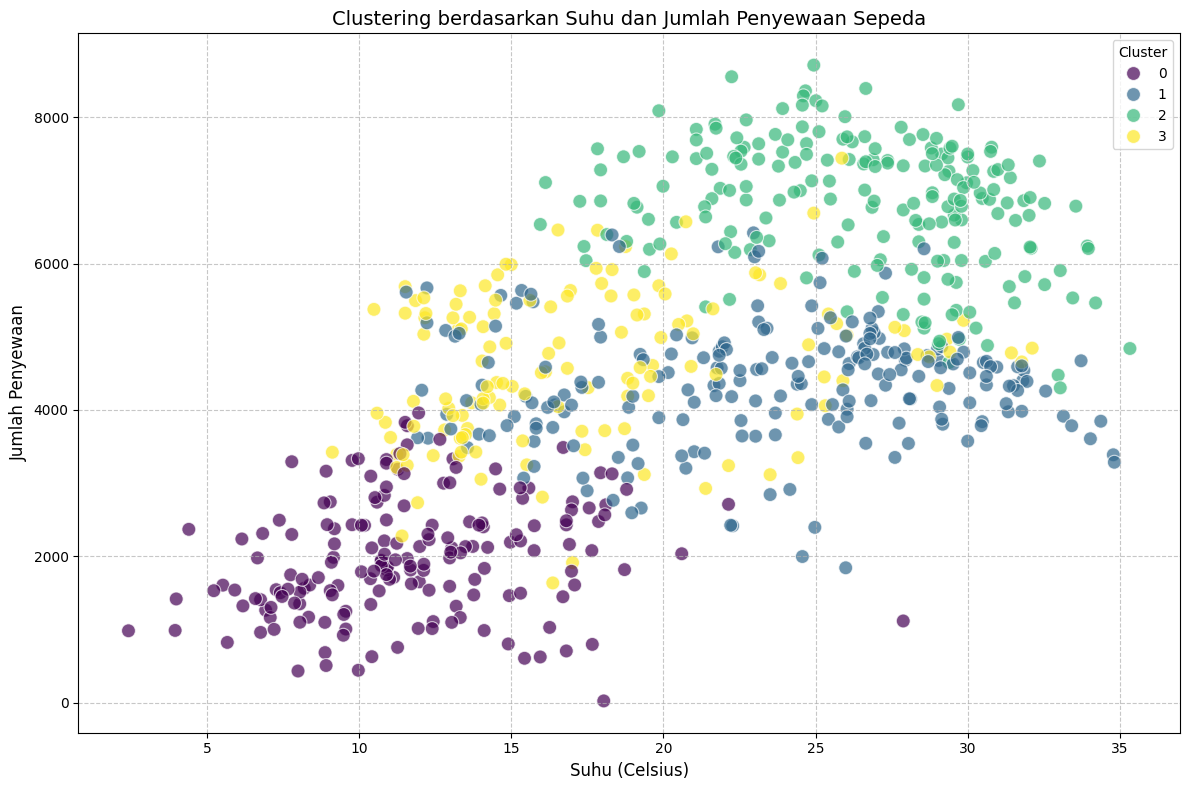

In [91]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='temp_actual', y='cnt', hue='cluster', data=day_data, palette='viridis', s=100, alpha=0.7)
plt.title('Clustering berdasarkan Suhu dan Jumlah Penyewaan Sepeda', fontsize=14)
plt.xlabel('Suhu (Celsius)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cluster', fontsize=10)
plt.tight_layout()
plt.show()

**Analisis karakteristik cluster berdasarkan musim**

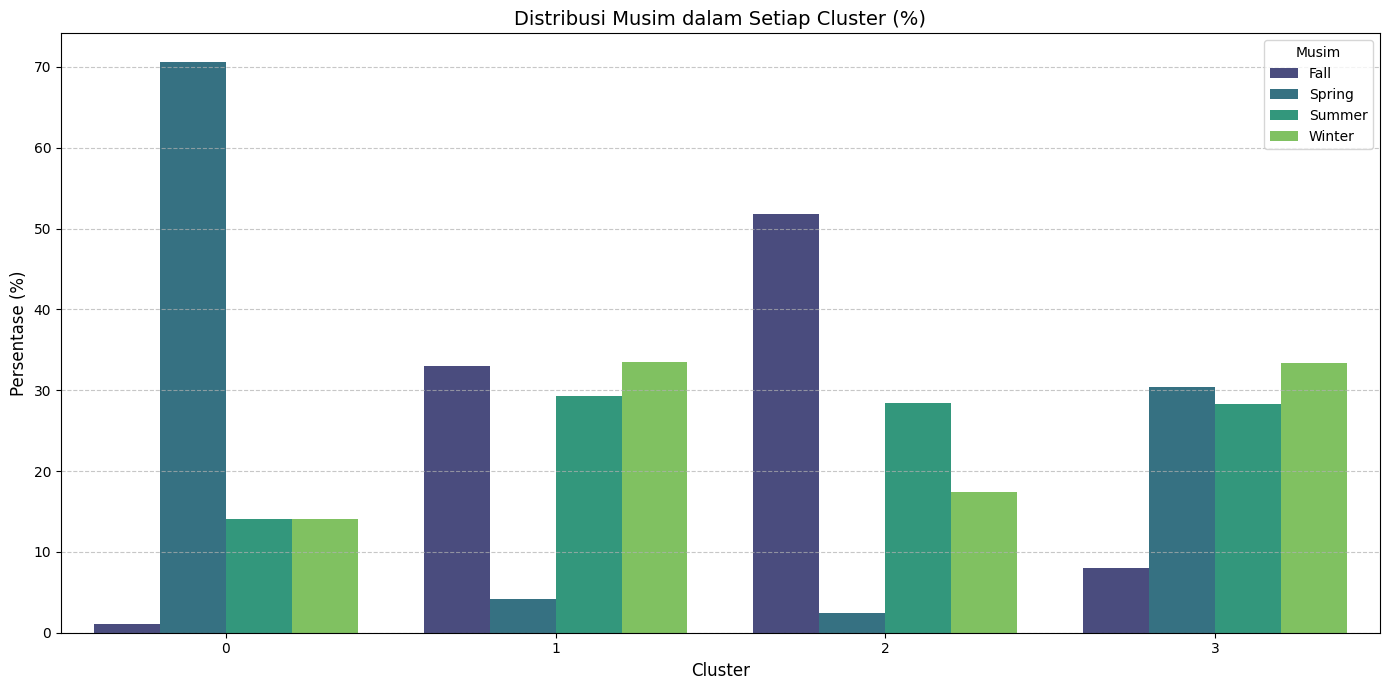

In [92]:
cluster_season = pd.crosstab(day_data['cluster'], day_data['season_label'], normalize='index') * 100
cluster_season_melted = cluster_season.reset_index().melt(id_vars=['cluster'], 
                                                         var_name='season', 
                                                         value_name='percentage')

plt.figure(figsize=(14, 7))
sns.barplot(x='cluster', y='percentage', hue='season', data=cluster_season_melted, palette='viridis')
plt.title('Distribusi Musim dalam Setiap Cluster (%)', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.legend(title='Musim', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analisis karakteristik cluster berdasarkan kondisi cuaca**

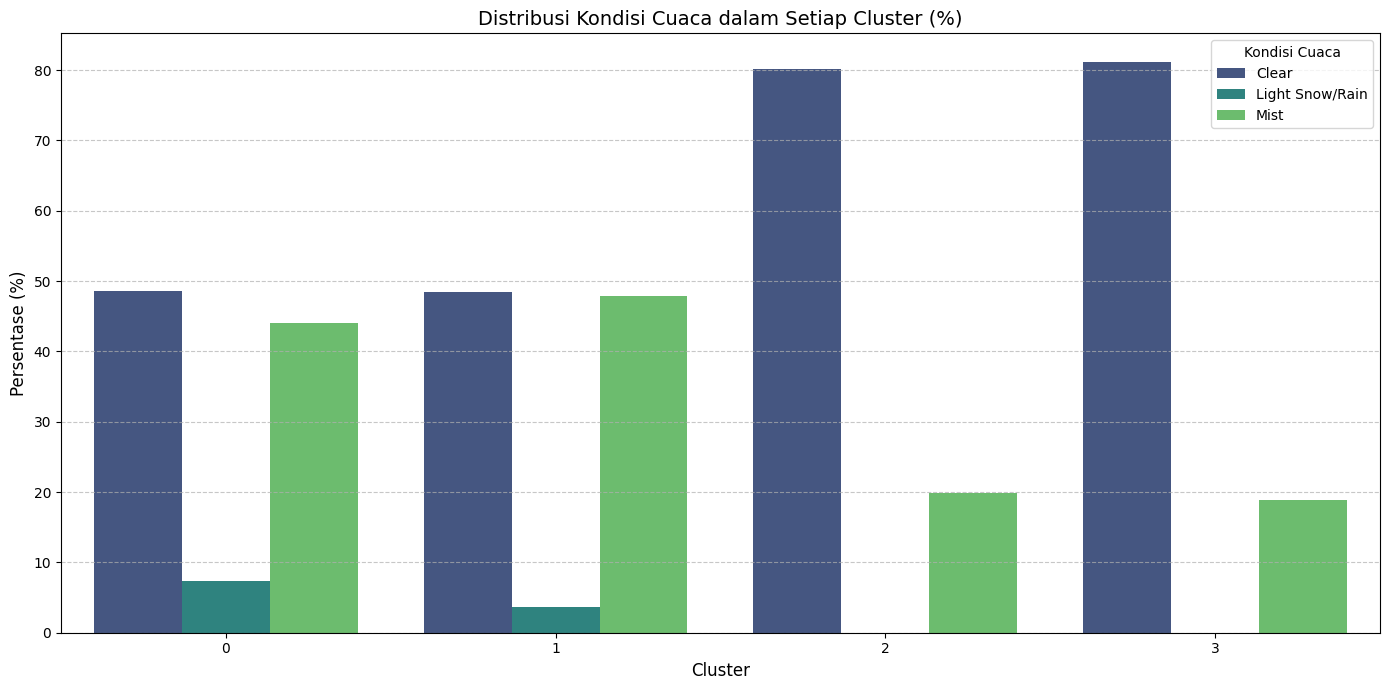

In [93]:
cluster_weather = pd.crosstab(day_data['cluster'], day_data['weather_label'], normalize='index') * 100
cluster_weather_melted = cluster_weather.reset_index().melt(id_vars=['cluster'], 
                                                          var_name='weather', 
                                                          value_name='percentage')

plt.figure(figsize=(14, 7))
sns.barplot(x='cluster', y='percentage', hue='weather', data=cluster_weather_melted, palette='viridis')
plt.title('Distribusi Kondisi Cuaca dalam Setiap Cluster (%)', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
-plt.legend(title='Kondisi Cuaca', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [99]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant             731 non-null    int64         
 1   dteday              731 non-null    datetime64[ns]
 2   season              731 non-null    int64         
 3   yr                  731 non-null    int64         
 4   mnth                731 non-null    int64         
 5   holiday             731 non-null    int64         
 6   weekday             731 non-null    int64         
 7   workingday          731 non-null    int64         
 8   weathersit          731 non-null    int64         
 9   temp                731 non-null    float64       
 10  atemp               731 non-null    float64       
 11  hum                 731 non-null    float64       
 12  windspeed           731 non-null    float64       
 13  casual              731 non-null    int64         

In [100]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant             17379 non-null  int64         
 1   dteday              17379 non-null  datetime64[ns]
 2   season              17379 non-null  int64         
 3   yr                  17379 non-null  int64         
 4   mnth                17379 non-null  int64         
 5   hr                  17379 non-null  int64         
 6   holiday             17379 non-null  int64         
 7   weekday             17379 non-null  int64         
 8   workingday          17379 non-null  int64         
 9   weathersit          17379 non-null  int64         
 10  temp                17379 non-null  float64       
 11  atemp               17379 non-null  float64       
 12  hum                 17379 non-null  float64       
 13  windspeed           17379 non-null  float64   

**Menyimpan Perubahan data**

In [101]:
hour_data.to_csv('hour_data_streamlit.csv', index=False)
day_data.to_csv('day_data_streamlit.csv', index=False)

## **Kesimpulan**

Berdasarkan analisis yang telah dilakukan, berikut adalah kesimpulan utama terkait penggunaan layanan bike sharing:

1. **Pengaruh Musim dan Cuaca:**
   - Musim panas dan musim gugur memiliki tingkat penyewaan sepeda tertinggi, sementara musim dingin memiliki tingkat penyewaan terendah.
   - Kondisi cuaca yang cerah (Clear) menunjukkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan kondisi cuaca lainnya.
   - Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda, dengan penyewaan optimal pada suhu sekitar 20-25°C.

2. **Perbedaan Pengguna Kasual dan Terdaftar:**
   - Pengguna terdaftar menunjukkan pola penggunaan yang stabil sepanjang minggu dengan lonjakan pada hari kerja, mengindikasikan penggunaan untuk komuter.
   - Pengguna kasual cenderung lebih banyak pada akhir pekan, menunjukkan penggunaan untuk rekreasi.
   - Pada musim panas, proporsi pengguna kasual meningkat signifikan, menunjukkan pengaruh musim terhadap perilaku pengguna.

3. **Waktu Puncak Penggunaan:**
   - Terdapat dua waktu puncak penyewaan pada hari kerja: sekitar pukul 8 pagi dan 5-6 sore, yang berkaitan dengan jam berangkat dan pulang kerja.
   - Pada akhir pekan, pola penyewaan lebih merata sepanjang hari dengan puncak pada siang hingga sore hari.
   - Hari kerja (Senin-Jumat) memiliki pola penggunaan yang berbeda dibandingkan akhir pekan, dengan total penyewaan yang lebih tinggi pada hari kerja.

4. **Faktor-faktor yang Mempengaruhi Penyewaan:**
   - Suhu merupakan faktor yang memiliki korelasi positif paling kuat dengan jumlah penyewaan (r = 0.62), menunjukkan bahwa peningkatan suhu hingga titik tertentu akan meningkatkan jumlah penyewa.
   - Kelembaban memiliki korelasi negatif dengan jumlah penyewaan (r = -0.10), yang berarti semakin tinggi kelembaban, semakin rendah jumlah penyewaan.
   - Kecepatan angin juga menunjukkan korelasi negatif lemah dengan jumlah penyewaan (r = -0.23).
   - Terdapat tren peningkatan penggunaan sepeda dari 2011 ke 2012, menunjukkan pertumbuhan popularitas layanan.

5. **Hasil Segmentasi dengan K-Means:**
   - Analisis cluster mengidentifikasi 4 kelompok hari dengan karakteristik berbeda:
     - **Cluster 0:** Hari dengan suhu rendah dan penggunaan rendah, didominasi oleh musim dingin dan musim semi.
     - **Cluster 1:** Hari dengan suhu sedang dan penggunaan tinggi, terutama pada musim gugur.
     - **Cluster 2:** Hari dengan suhu tinggi dan penggunaan sangat tinggi, didominasi oleh musim panas dan musim gugur.
     - **Cluster 3:** Hari dengan kondisi cuaca buruk (hujan/salju ringan), kelembaban tinggi, dan penggunaan rendah.

## **Rekomendasi Bisnis**



Berdasarkan hasil analisis, berikut adalah beberapa rekomendasi untuk meningkatkan layanan bike sharing:

1. **Manajemen Armada Berdasarkan Pola Musiman:**
   - Tingkatkan jumlah sepeda yang tersedia selama musim panas dan musim gugur, serta pada hari-hari dengan prakiraan cuaca cerah dan suhu optimal.
   - Kurangi jumlah sepeda yang beroperasi selama musim dingin atau saat cuaca buruk, dan alokasikan sumber daya untuk pemeliharaan sepeda pada periode ini.

2. **Strategi Pemasaran yang Ditargetkan:**
   - Targetkan kampanye pemasaran untuk pengguna kasual selama akhir pekan dan musim panas, dengan fokus pada aktivitas rekreasi dan wisata.
   - Tawarkan program keanggotaan khusus untuk komuter reguler, seperti diskon pada hari kerja atau paket berlangganan bulanan.
   - Kembangkan promosi khusus untuk meningkatkan penggunaan pada jam sepi (siang hari) untuk meratakan permintaan.

3. **Optimalisasi Lokasi Stasiun:**
   - Pastikan ketersediaan sepeda yang cukup di stasiun-stasiun dekat area perkantoran sebelum dan sesudah jam kerja (8 pagi dan 5-6 sore).
   - Tingkatkan kapasitas stasiun di area rekreasi dan wisata selama akhir pekan dan musim panas.

4. **Inovasi untuk Mengatasi Keterbatasan Cuaca:**
   - Pertimbangkan penambahan sepeda dengan atap pelindung atau fitur anti hujan untuk meningkatkan penggunaan pada hari dengan cuaca buruk.
   - Kembangkan insentif khusus untuk mendorong penggunaan sepeda pada kondisi cuaca yang kurang ideal (misalnya, diskon untuk penyewaan pada hari hujan ringan).

5. **Pengembangan Program Loyalitas:**
   - Berikan insentif untuk pengguna terdaftar yang konsisten menggunakan layanan, terutama bagi mereka yang bersepeda pada kondisi kurang ideal.
   - Kembangkan sistem poin yang dapat ditukarkan dengan waktu penyewaan gratis atau diskon.

6. **Perencanaan Maintenance:**
   - Jadwalkan pemeliharaan besar selama periode penggunaan rendah (musim dingin atau cuaca buruk).
   - Implementasikan sistem pemantauan prediktif untuk mengantisipasi lonjakan permintaan berdasarkan prakiraan cuaca.

7. **Ekspansi Layanan:**
   - Pertimbangkan untuk menambah jenis sepeda yang ditawarkan (seperti sepeda listrik) untuk mengatasi tantangan terkait suhu tinggi, kelembaban, atau kecepatan angin.
   - Eksplorasi integrasi dengan transportasi umum lainnya untuk mendorong penggunaan multimodal, terutama pada kondisi cuaca buruk.

## **Referensi**

1. Fanaee-T, Hadi, dan Gama, Joao. (2013). Event labeling combining ensemble detectors and background knowledge. Progress in Artificial Intelligence. pp. 1-15. Springer Berlin Heidelberg.
2. Capital Bikeshare. (2011-2012). Historical trip data. Retrieved from https://www.capitalbikeshare.com/system-data
3. Weather Underground. (2011-2012). Historical Weather Data for Washington, D.C. Retrieved from https://www.wunderground.com

---

*Catatan: Dataset yang digunakan dalam analisis ini tersedia secara publik dan berisi data historis dari sistem Capital Bikeshare di Washington D.C. untuk periode 2011-2012. Analisis ini bertujuan untuk memahami pola penggunaan sepeda dan faktor-faktor yang mempengaruhinya untuk meningkatkan layanan bike sharing.*